In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
path = './Dataset/'
address_csv = 'passingevents.csv'
df = pd.read_csv(path + address_csv)
print(df.head(5))
player_des_huskies = df[df["TeamID"] == 'Huskies'].iloc[:, 3]  # des为HusKies接球队员
player_ori_huskies = df[df["TeamID"] == 'Huskies'].iloc[:, 2]  # ori为Huskies出球队员
player_ori_huskies = list(player_ori_huskies.unique())
player_des_huskies = list(player_des_huskies.unique())
weight = [0.780373832, 0.81795196, 0.812659847, 0.832448093, 0.842606707, 0.841178878, 0.83362069,
          0.849388753, 0.835820896, 0.836218375, 0.842622951, 0.84305835, 0.812176166, 0.829679595,
          0.806215722, 0.705202312, 0.773413897, 0.746212121, 0.79342723, 0.720430108, 0.645833333,
          0.714285714, 0.721518987, 0.639344262, 0.818181818, 0.846153846, 0.9375, 0.875, 0.8, 0.8, 0.8,
          0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
dis_ori_x = list(df["EventOrigin_x"])
dis_ori_y = list(df["EventOrigin_y"])
dis_des_x = list(df["EventDestination_x"])
dis_des_y = list(df["EventDestination_y"])
distance = []
for i in range(len(dis_des_y)):
    distance.append(((dis_ori_x[i] - dis_des_x[i]) ** 2 + (dis_des_y[i] - dis_ori_y[i]) ** 2) ** 0.5)
    distance[i] = int(distance[i] / 3)

   MatchID     TeamID OriginPlayerID DestinationPlayerID MatchPeriod  \
0        1    Huskies     Huskies_D1          Huskies_F1          1H   
1        1    Huskies     Huskies_M1          Huskies_F2          1H   
2        1  Opponent1   Opponent1_D2        Opponent1_G1          1H   
3        1  Opponent1   Opponent1_G1        Opponent1_F1          1H   
4        1    Huskies     Huskies_M2          Huskies_M3          1H   

   EventTime EventSubType  EventOrigin_x  EventOrigin_y  EventDestination_x  \
0  46.323501    Head pass             34             97                59.0   
1  51.022546  Simple pass             53             89                69.0   
2  89.008721  Simple pass             19             16                 5.0   
3  92.216160       Launch              5             50                67.0   
4  98.265191  Simple pass             42             55                36.0   

   EventDestination_y  
0                95.0  
1                91.0  
2                50.

In [3]:
pairs_distinct_di=[]
for i in range(len(player_ori_huskies)):
    for j in range(len(player_ori_huskies)):
        if(i!=j):
            pairs_distinct_di.append([player_ori_huskies[i],player_ori_huskies[j]])
ori_player=df.iloc[:,2].tolist()
des_player=df.iloc[:,3].tolist()
count_link_di=[]
pairs_each=[]
k=0
for i in range(len(pairs_distinct_di)):
    count_link_di.append(0)
pairs_distinct_di_1=[]
for i in range(len(player_ori_huskies)):
    for j in range(len(player_ori_huskies)):
        if(i!=j):
            pairs_distinct_di_1.append([player_ori_huskies[i],player_ori_huskies[j]])
for k in range(len(pairs_distinct_di_1)):
    pairs_distinct_di_1[k].append(count_link_di[k])

adjacency=pairs_distinct_di_1

In [4]:
Hus_data = df.loc[df['TeamID'] == 'Huskies']
groupOri = Hus_data.groupby(['MatchID', 'OriginPlayerID']).count()
groupDes = Hus_data.groupby(['MatchID', 'DestinationPlayerID']).count()
groupOri = pd.DataFrame(groupOri, columns=['TeamID'])
groupDes = pd.DataFrame(groupDes, columns=['TeamID'])
groupOri.rename(columns={'TeamID': 'count1'}, inplace=True)
groupDes.rename(columns={'TeamID': 'count2'}, inplace=True)
sumCount = pd.concat([groupOri, groupDes], axis=1)
sumCount.fillna(0, inplace=True)
sumCount['count'] = sumCount['count1'] + sumCount['count2']
index = sumCount.index.to_frame()
sumCount = pd.concat([sumCount['count'], index['MatchID']], axis=1)  #每场比赛每名球员传球数（传出+接受）
sumbyPlayer = pd.concat([sumCount['count'], index[1]], axis=1)
PointSize = sumbyPlayer.groupby(1).sum()  #每名球员所有场次传球数和

<Figure size 2400x1600 with 0 Axes>

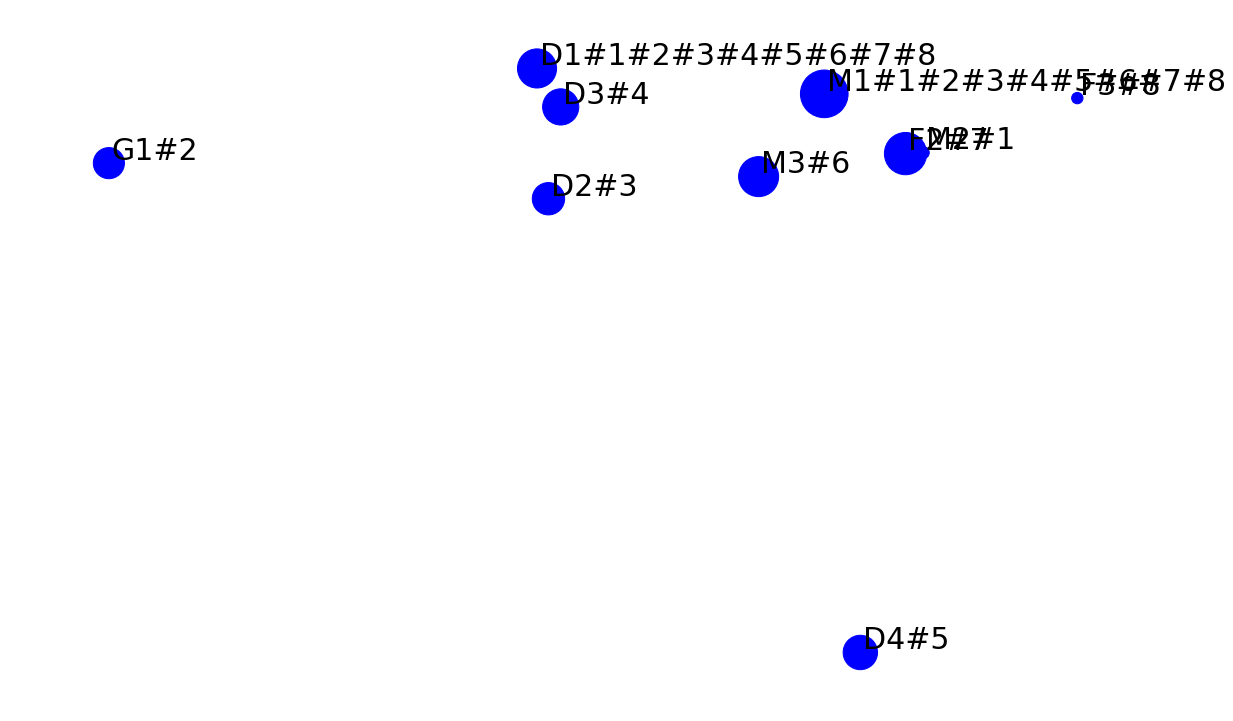

In [10]:
top_node_tri=8
adjacency_3=pairs_distinct_di_1
# for n, nbrs in G.adjacency():
#     for nbr, eattr in nbrs.items():
#         data = eattr['weight']
#         adjacency_3.append([n,nbr,data])
three_adj=[]
for i in range(len(adjacency)-1):
    for j in range(i+1,len(adjacency)):
        if(len(list(set(adjacency[i][0:2]+adjacency[j][0:2])))==3 and adjacency[i][1]==adjacency[j][0]):
            three_adj.append([adjacency[i][0],adjacency[i][1],adjacency[i][2],adjacency[j][0],adjacency[j][1],adjacency[j][2],adjacency[i][2]+adjacency[j][2]])
# print(three_adj[0:20])
test_3=pd.DataFrame(data=three_adj)

arr_tri_edge=[]
arr_tri_edge=np.array(test_3)

data_3=arr_tri_edge
idex_3=np.lexsort([-1*data_3[:,6]])
sorted_data_3 = data_3[idex_3, :]
arr_tri_edge=sorted_data_3.tolist()
# arr_tri=arr_tri_edge[0::36]
arr_tri_edge=arr_tri_edge[0:top_node_tri]
for i in range(top_node_tri):
    arr_tri_edge[i].append('#'+str(i+1))

inlist_tri_name=[]
inlist_tri_weight=[]
for i in arr_tri_edge:
    for j in range(2):
        inlist_tri_name.append(i[j])
        inlist_tri_name.append(i[j+3])
    inlist_tri_weight.append([i[0],i[1],i[2]])
    inlist_tri_weight.append([i[3],i[4],i[5]])

inlist_tri_name=list(set(inlist_tri_name))
inlist_tri_name.sort()
inlist_tri_link=[]
for i in range(len(inlist_tri_name)):
    inlist_tri_link.append('')
    for j in range(len(arr_tri_edge)):
        if(inlist_tri_name[i] in arr_tri_edge[j]):
            inlist_tri_link[i]=inlist_tri_link[i]+arr_tri_edge[j][7]
player_ori_arr = []
player_des_arr = []
player_x = []
player_y = []
pos_player_mean = {}

for i in inlist_tri_name:
    _df1 = df[df['OriginPlayerID']==i]
    _df2 = df[df['DestinationPlayerID']==i]
    player_ori_arr.append(_df1)
    player_des_arr.append(_df2)

    _x1 = list(_df1['EventOrigin_x'])
    _x2 = list(_df2['EventDestination_x'])
    _x = _x1+_x2
    _mean_x = np.sum(_x)/np.size(_x)

    _y1 = list(_df1['EventOrigin_y'])
    _y2 = list(_df2['EventDestination_y'])
    _y = _y1+_y2
    _mean_y = np.sum(_y)/np.size(_y)/105*65

    player_x.append(_mean_x)
    player_y.append(_mean_y)

    _l = [_mean_x, _mean_y]
    pos_player_mean[i] = _l
plt.figure(dpi=400)
plt.figure(figsize=[21,13])
TG=nx.MultiDiGraph()
TG.add_nodes_from(inlist_tri_name)#添加点a
TG.add_weighted_edges_from(inlist_tri_weight)
# print(inlist_tri_weight)
nodesizes=[]
for i in inlist_tri_name:
    nodesizes.append(int(PointSize.loc[i]))
M = TG.number_of_edges() # 边的数量

edge_colors = range(2, M + 2)

nodes = nx.draw_networkx_nodes(TG, pos_player_mean, node_size=nodesizes, node_color='blue')
edges = nx.draw_networkx_edges(TG, pos_player_mean, node_size=nodesizes, arrowstyle='->',
                               arrowsize=20, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues,
                               edge_vmin=0,edge_vmax=5,width=[float(v['weight']/10) for (r,c,v) in TG.edges(data=True)])


for i in range(len(inlist_tri_name)):
    _player = inlist_tri_name[i]
    _x, _y = pos_player_mean[_player]
    plt.text(_x+0.14, _y+0.15, _player[8:]+inlist_tri_link[i], size = 30, alpha = 1)
ax = plt.gca()
ax.set_axis_off() # 取消图的边框

plt.show()